### This notebook has the asnwer to the last question, 5th of the assessment.

## 5. Use the current sample database to find insights. Please document your steps, include any code/documents you used (Excel, SQL, Python, etc), and have the final results in a Powerpoint format (limit 3 slides)
   *Hint*: This is open ended, but you could look at sales trend, category insights, customers insights

In [191]:
# Let's start by importing the essential libraries first
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Let's read in our csv files into Jupyter and conduct analysis


In [5]:
prod= pd.read_csv('C:/Users/USER/Desktop/Forma data challenge/products.csv')
prod

,prod_id,prod_name,brand,category
0,242151,Product 242151,Y,Make up
1,245067,Product 245067,D,Women
2,279311,Product 279311,C,Women
3,75231178,Product 75231178,C,Make up
4,218423,Product 218423,S,Women
...,...,...,...,...
1858,268780,Product 268780,T,Women
1859,502545,Product 502545,E,Women
1860,514296,Product 514296,D,Women
1861,166838310,Product 166838310,M,Make up


In [4]:
seg= pd.read_csv('C:/Users/USER/Desktop/Forma data challenge/segments.csv')
seg

,cust_id,seg_name,update_at,active_flag
0,4402,ONE-OFFS,2014-06-01 00:00:00,N
1,4402,LAPSED,2015-12-01 00:00:00,N
2,4402,LAPSED,2015-06-01 00:00:00,N
3,4402,LAPSED,2014-01-01 00:00:00,N
4,4402,ONE-OFFS,2016-02-01 00:00:00,Y
...,...,...,...,...
6119,21233469,NEW,2016-02-01 00:00:00,Y
6120,21233549,NEW,2016-02-01 00:00:00,Y
6121,21233596,NEW,2016-02-01 00:00:00,Y
6122,21233911,NEW,2016-02-01 00:00:00,Y


In [6]:
trans= pd.read_csv('C:/Users/USER/Desktop/Forma data challenge/transactions.csv')
trans

,trans_id,trans_dt,cust_id,prod_id,item_qty,item_price
0,1,2016-01-02 10:06:00,9085146,223029,1,42.99
1,2,2016-01-02 10:30:00,1215814,252270,1,103.95
2,2,2016-01-02 10:30:00,1215814,260383,1,74.99
3,4,2016-01-02 11:33:00,18511160,269119,1,51.99
4,4,2016-01-02 11:33:00,18511160,411162,1,59.99
...,...,...,...,...,...,...
2661,2662,2016-06-18 10:00:00,3649704,354724683,1,49.99
2662,2662,2016-06-18 10:00:00,3649704,365543537,1,30.99
2663,2662,2016-06-18 10:00:00,3649704,364872356,1,41.99
2664,2665,2016-06-18 17:51:00,4095901,277123,1,89.99


In [10]:
# Let's check if the transaction date is a datetime if not we'll convert it
trans['trans_dt'].dtype

dtype('O')

In [12]:
trans['trans_dt']= pd.to_datetime(trans['trans_dt'])
trans['trans_dt'].dtype

dtype('<M8[ns]')

After converting and re-checking the data type it's now a date-time format.

In [276]:
trans['item_qty'].unique()

array([1, 4, 2, 3], dtype=int64)

Let's add a new column with the total because we have 1-4 unique item quantities.

In [107]:
trans['total']= trans['item_qty']*trans['item_price']
trans

,trans_id,trans_dt,cust_id,prod_id,item_qty,item_price,total
0,1,2016-01-02 10:06:00,9085146,223029,1,42.99,42.99
1,2,2016-01-02 10:30:00,1215814,252270,1,103.95,103.95
2,2,2016-01-02 10:30:00,1215814,260383,1,74.99,74.99
3,4,2016-01-02 11:33:00,18511160,269119,1,51.99,51.99
4,4,2016-01-02 11:33:00,18511160,411162,1,59.99,59.99
...,...,...,...,...,...,...,...
2661,2662,2016-06-18 10:00:00,3649704,354724683,1,49.99,49.99
2662,2662,2016-06-18 10:00:00,3649704,365543537,1,30.99,30.99
2663,2662,2016-06-18 10:00:00,3649704,364872356,1,41.99,41.99
2664,2665,2016-06-18 17:51:00,4095901,277123,1,89.99,89.99


In [117]:
# Making a copy to be safe
ts= trans.copy()

In [126]:
# Sorting values
ts.sort_values(by= ['total'], ascending= False, inplace= True, ignore_index= True)
ts

,trans_id,trans_dt,cust_id,prod_id,item_qty,item_price,total
0,2437,2016-05-10 12:40:00,1586145,280608,2,134.95,269.90
1,914,2016-01-02 15:51:00,9341276,224086,2,108.95,217.90
2,1678,2016-01-04 17:45:00,12490465,236135916,1,215.95,215.95
3,2518,2016-05-17 15:47:00,4539121,228543,2,97.99,195.98
4,2644,2016-06-15 14:12:00,4599565,236770,1,189.95,189.95
...,...,...,...,...,...,...,...
2661,1067,2016-01-02 12:28:00,10543604,226594814,1,0.49,0.49
2662,594,2016-01-02 11:44:00,9358075,226594814,1,0.49,0.49
2663,1564,2016-01-02 09:45:00,6048519,239892,1,0.49,0.49
2664,533,2016-01-02 16:34:00,2617514,239892,1,0.49,0.49


Let's group by the product id to see which product had the most and least sales.

In [178]:
ts2= ts.groupby(ts['prod_id'])['total'].sum()
ts2.sort_values(ascending= False, inplace= True)
ts2

prod_id
199922        25.99
207344        15.99
209732        80.99
209999        26.99
211115       101.95
              ...  
398829613     29.98
403716082     35.99
407168795     24.99
407168814     21.99
407820712      1.99
Name: total, Length: 1863, dtype: float64

In [179]:
ts2.sort_values(ascending= False, inplace= True)
ts2

prod_id
228543       685.93
256674       607.92
248261       467.85
252891       455.85
453580       426.93
              ...  
275990885      0.99
239892         0.98
248590         0.90
138262079      0.50
225235728      0.49
Name: total, Length: 1863, dtype: float64

Let's convert into a data frame  which will make it easier to plot.

In [278]:
ts2= pd.DataFrame(data= ts2 , columns= ['total'] )
ts2.reset_index(inplace= True)
ts2

,prod_id,total
0,199922,25.99
1,207344,15.99
2,209732,80.99
3,209999,26.99
4,211115,101.95
...,...,...
1858,398829613,29.98
1859,403716082,35.99
1860,407168795,24.99
1861,407168814,21.99


Let's take the top the top 5 and bottom 5 to plot a graph.

In [193]:
ts3= ts2.head(5)
ts4= ts2.tail(5)
ts3

,prod_id,total
0,228543,685.93
1,256674,607.92
2,248261,467.85
3,252891,455.85
4,453580,426.93


In [194]:
ts4

,prod_id,total
1858,275990885,0.99
1859,239892,0.98
1860,248590,0.90
1861,138262079,0.50
1862,225235728,0.49


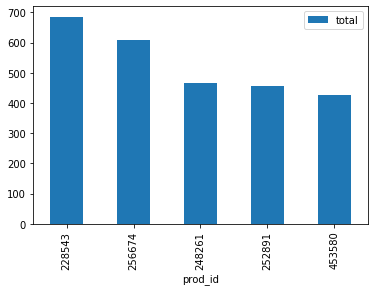

In [214]:
ts3.plot('prod_id', 'total', kind= 'bar')

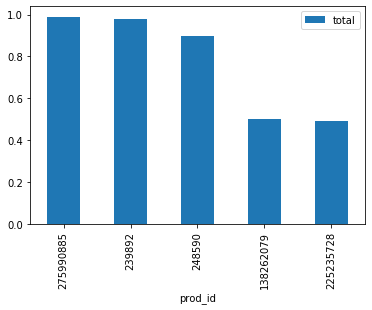

In [217]:
ts4.plot('prod_id', 'total', kind= 'bar')

In [218]:
trans

,trans_id,trans_dt,cust_id,prod_id,item_qty,item_price,total
0,1,2016-01-02 10:06:00,9085146,223029,1,42.99,42.99
1,2,2016-01-02 10:30:00,1215814,252270,1,103.95,103.95
2,2,2016-01-02 10:30:00,1215814,260383,1,74.99,74.99
3,4,2016-01-02 11:33:00,18511160,269119,1,51.99,51.99
4,4,2016-01-02 11:33:00,18511160,411162,1,59.99,59.99
...,...,...,...,...,...,...,...
2661,2662,2016-06-18 10:00:00,3649704,354724683,1,49.99,49.99
2662,2662,2016-06-18 10:00:00,3649704,365543537,1,30.99,30.99
2663,2662,2016-06-18 10:00:00,3649704,364872356,1,41.99,41.99
2664,2665,2016-06-18 17:51:00,4095901,277123,1,89.99,89.99


Now let's conduct yearly analysis if sales.
Before that let's convert the trans_dt column into months and years.

In [219]:
trans['Month']= trans['trans_dt'].dt.month
trans['Year']= trans['trans_dt'].dt.year
trans

,trans_id,trans_dt,cust_id,prod_id,item_qty,item_price,total,Month,Year
0,1,2016-01-02 10:06:00,9085146,223029,1,42.99,42.99,1,2016
1,2,2016-01-02 10:30:00,1215814,252270,1,103.95,103.95,1,2016
2,2,2016-01-02 10:30:00,1215814,260383,1,74.99,74.99,1,2016
3,4,2016-01-02 11:33:00,18511160,269119,1,51.99,51.99,1,2016
4,4,2016-01-02 11:33:00,18511160,411162,1,59.99,59.99,1,2016
...,...,...,...,...,...,...,...,...,...
2661,2662,2016-06-18 10:00:00,3649704,354724683,1,49.99,49.99,6,2016
2662,2662,2016-06-18 10:00:00,3649704,365543537,1,30.99,30.99,6,2016
2663,2662,2016-06-18 10:00:00,3649704,364872356,1,41.99,41.99,6,2016
2664,2665,2016-06-18 17:51:00,4095901,277123,1,89.99,89.99,6,2016


In [222]:
# Rechecking if we only have one year 
trans['Year'].unique()

array([2016], dtype=int64)

Now let's group by months and see which months had the highest sales.

In [221]:
trans.groupby(by= trans['Month'])['total'].sum()

Month
1    66774.66
2     6699.13
3     8591.29
4     8566.65
5     8219.08
6     4337.53
Name: total, dtype: float64

In [279]:
# Merging our 3 csv's into a single dataset.
new_trans= trans.merge(right= prod , on= 'prod_id')

In [22]:
new_trans

,trans_id,trans_dt,cust_id,prod_id,item_qty,item_price,prod_name,brand,category
0,1,2016-01-02 10:06:00,9085146,223029,1,42.99,Product 223029,L,Make up
1,2,2016-01-02 10:30:00,1215814,252270,1,103.95,Product 252270,R,Women
2,2,2016-01-02 10:30:00,1215814,260383,1,74.99,Product 260383,C,Women
3,4,2016-01-02 11:33:00,18511160,269119,1,51.99,Product 269119,L,Women
4,365,2016-01-02 13:06:00,3011121,269119,1,51.99,Product 269119,L,Women
...,...,...,...,...,...,...,...,...,...
2661,2662,2016-06-18 10:00:00,3649704,236727,1,73.99,Product 236727,H,Women
2662,2662,2016-06-18 10:00:00,3649704,354724683,1,49.99,Product 354724683,D,Men
2663,2662,2016-06-18 10:00:00,3649704,365543537,1,30.99,Product 365543537,L,Women
2664,2665,2016-06-18 17:51:00,4095901,277123,1,89.99,Product 277123,G,Men


In [24]:
# Checking for any null values
new_trans.isnull().sum()

trans_id      0
trans_dt      0
cust_id       0
prod_id       0
item_qty      0
item_price    0
prod_name     0
brand         0
category      0
dtype: int64

In [62]:
# Finally making into one single data set
sales= new_trans.merge(seg, on = 'cust_id')
sales

,trans_id,trans_dt,cust_id,prod_id,item_qty,item_price,prod_name,brand,category,seg_name,update_at,active_flag
0,1,2016-01-02 10:06:00,9085146,223029,1,42.99,Product 223029,L,Make up,LAPSED,2014-03-01 00:00:00,N
1,1,2016-01-02 10:06:00,9085146,223029,1,42.99,Product 223029,L,Make up,INACTIVE,2014-09-01 00:00:00,N
2,1,2016-01-02 10:06:00,9085146,223029,1,42.99,Product 223029,L,Make up,LAPSED,2014-01-01 00:00:00,N
3,1,2016-01-02 10:06:00,9085146,223029,1,42.99,Product 223029,L,Make up,GONE AWAY,2015-11-01 00:00:00,N
4,1,2016-01-02 10:06:00,9085146,223029,1,42.99,Product 223029,L,Make up,ONE-OFFS,2016-02-01 00:00:00,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
18092,2274,2016-04-09 09:27:00,2595690,118265512,1,34.99,Product 118265512,D,Women,ONE-OFFS,2015-11-01 00:00:00,N
18093,2274,2016-04-09 09:27:00,2595690,335061021,1,33.99,Product 335061021,Y,Make up,INFREQUENT,2016-02-01 00:00:00,Y
18094,2274,2016-04-09 09:27:00,2595690,335061021,1,33.99,Product 335061021,Y,Make up,LAPSED,2014-01-01 00:00:00,N
18095,2274,2016-04-09 09:27:00,2595690,335061021,1,33.99,Product 335061021,Y,Make up,INACTIVE,2014-05-01 00:00:00,N


In [63]:
# Checking for any null values
sales.isnull().sum()

trans_id       0
trans_dt       0
cust_id        0
prod_id        0
item_qty       0
item_price     0
prod_name      0
brand          0
category       0
seg_name       0
update_at      0
active_flag    0
dtype: int64

In [64]:
# Checking for any duplicate rows
sales.duplicated().sum()

2

In [65]:
# Since we have only 2 duplicates let's drop it 
sales= sales.drop_duplicates()

In [67]:
# Re-checking if we have any duplicates
sales.duplicated().sum()

0

In [226]:
# Checking for unique brand names
prod['brand'].unique()

array(['Y', 'D', 'C', 'S', 'L', 'M', 'E', 'A', 'G', 'P', 'B', 'H', 'K',
       'F', 'J', 'I', 'U', 'V', 'Z', 'T', 'N', 'R'], dtype=object)

In [227]:
seg

,cust_id,seg_name,update_at,active_flag
0,4402,ONE-OFFS,2014-06-01 00:00:00,N
1,4402,LAPSED,2015-12-01 00:00:00,N
2,4402,LAPSED,2015-06-01 00:00:00,N
3,4402,LAPSED,2014-01-01 00:00:00,N
4,4402,ONE-OFFS,2016-02-01 00:00:00,Y
...,...,...,...,...
6119,21233469,NEW,2016-02-01 00:00:00,Y
6120,21233549,NEW,2016-02-01 00:00:00,Y
6121,21233596,NEW,2016-02-01 00:00:00,Y
6122,21233911,NEW,2016-02-01 00:00:00,Y


In [229]:
# Converting our update_at column into date time format to conduct analysis
seg['update_at']= pd.to_datetime(seg['update_at'])
seg['update_at'].dtype

dtype('<M8[ns]')

In [230]:
# Extracting months and years 
seg['Month']= seg['update_at'].dt.month
seg['Year']= seg['update_at'].dt.year

In [231]:
# Rechecking
seg

,cust_id,seg_name,update_at,active_flag,Month,Year
0,4402,ONE-OFFS,2014-06-01,N,6,2014
1,4402,LAPSED,2015-12-01,N,12,2015
2,4402,LAPSED,2015-06-01,N,6,2015
3,4402,LAPSED,2014-01-01,N,1,2014
4,4402,ONE-OFFS,2016-02-01,Y,2,2016
...,...,...,...,...,...,...
6119,21233469,NEW,2016-02-01,Y,2,2016
6120,21233549,NEW,2016-02-01,Y,2,2016
6121,21233596,NEW,2016-02-01,Y,2,2016
6122,21233911,NEW,2016-02-01,Y,2,2016


In [232]:
# Checking our unique seg name 
seg['seg_name'].unique()

array(['ONE-OFFS', 'LAPSED', 'LOYAL', 'INACTIVE', 'INFREQUENT',
       'GONE AWAY', 'VIP', 'NEW'], dtype=object)

In [267]:
# Grouping by  months, years and seg_name
seg2= seg.groupby(['seg_name','Month', 'Year'])['seg_name'].count()
seg2

seg_name   Month  Year
GONE AWAY  1      2014    32
           4      2014     1
                  2015     2
           6      2015    16
           7      2015     1
                          ..
VIP        10     2015    14
           11     2014    19
                  2015    19
           12     2014    14
                  2015    17
Name: seg_name, Length: 204, dtype: int64

In [273]:
# Grouping by years and seg_name to see which segment has the highest count
seg2= seg.groupby(['seg_name', 'Year'])['seg_name'].count()
seg2.sort_values(ascending=False)

seg_name    Year
INFREQUENT  2014    824
            2015    657
            2016    549
ONE-OFFS    2014    460
            2016    414
LOYAL       2014    406
            2015    382
ONE-OFFS    2015    373
LAPSED      2014    322
            2015    266
VIP         2014    259
LOYAL       2016    247
VIP         2015    206
INACTIVE    2015    136
VIP         2016    120
GONE AWAY   2015    101
INACTIVE    2014     79
            2016     78
NEW         2016     75
            2014     54
            2015     49
GONE AWAY   2014     34
LAPSED      2016     33
Name: seg_name, dtype: int64

In [274]:
# Let's see in general which segment has the highest count
seg3= seg.groupby(['seg_name'])['seg_name'].count()
seg3.sort_values(ascending=False)

seg_name
INFREQUENT    2030
ONE-OFFS      1247
LOYAL         1035
LAPSED         621
VIP            585
INACTIVE       293
NEW            178
GONE AWAY      135
Name: seg_name, dtype: int64